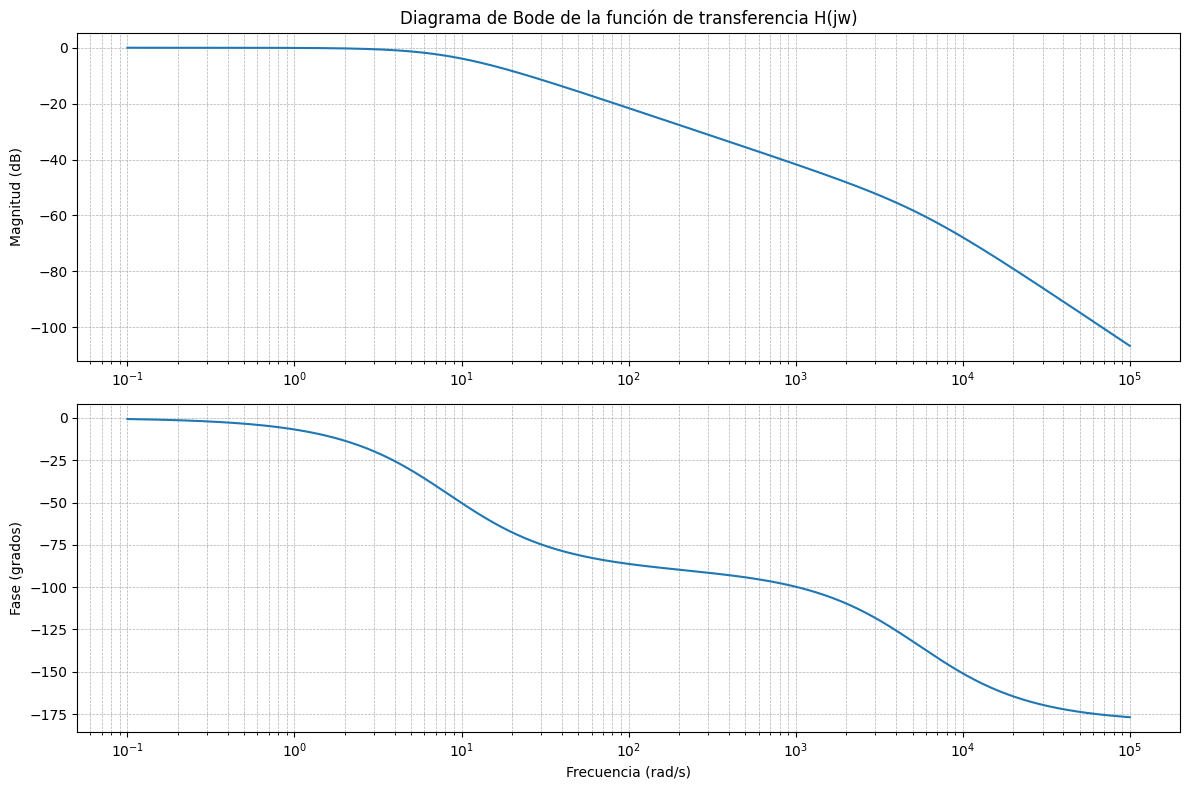

In [3]:
# Graficar el diagrama de Bode de la función de H(w) = 1 / (1+RCjw+LC(jw)^2)
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito RLC
R = 1000         # Resistencia en ohmios
L = 180*10**-3   # Inductancia en henrios
C = 120*10**-6   # Capacitancia en faradios

# Función de transferencia H(jw)
def H(w):
    jw = 1j * w
    return 1 / (1 + R * C * jw + L * C * (jw)**2)

# Rango de frecuencias
frequencies = np.logspace(-1, 5, num=500)  # De 10^1 a 10^5 rad/s
H_values = H(frequencies)
magnitude = 20 * np.log10(np.abs(H_values))  # Magnitud en dB
phase = np.angle(H_values, deg=True)         # Fase en grados

# Graficar el diagrama de Bode
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitude)
plt.title('Diagrama de Bode de la función de transferencia H(jw)')
plt.ylabel('Magnitud (dB)')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase)
plt.ylabel('Fase (grados)')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

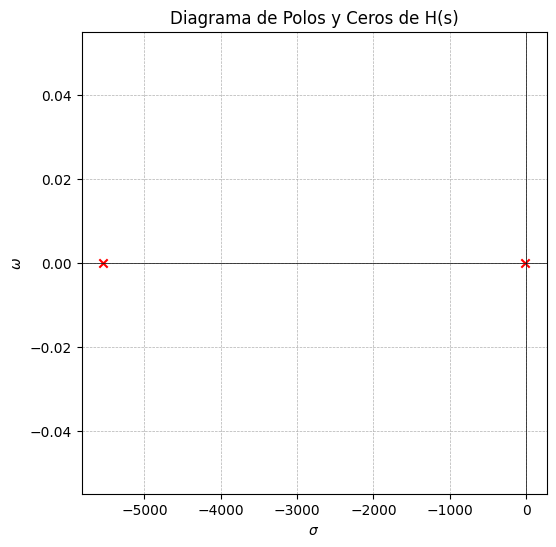

In [7]:
# En Laplace, el diagrama de polos y ceros de H(s) = 1 / (1+RCs+LCs^2)
import sympy as sp
s = sp.symbols('s')
H_s = 1 / (1 + R * C * s + L * C * s**2)
poles = sp.solve(sp.denom(H_s), s)
zeros = sp.solve(sp.numer(H_s), s)

# Graficar polos y ceros
plt.figure(figsize=(6, 6))
# scatter: Función para graficar puntos
# scatter(x, y, marker, color)
plt.scatter([sp.re(zero) for zero in zeros], [sp.im(zero) for zero in zeros], marker='o', color='blue', label='Ceros')
plt.scatter([sp.re(pole) for pole in poles], [sp.im(pole) for pole in poles], marker='x', color='red', label='Polos')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title('Diagrama de Polos y Ceros de H(s)')
plt.xlabel('$\\sigma$')
plt.ylabel('$\\omega$')
plt.grid(which='both', linestyle='--', linewidth=0.5)

In [ ]:
# physics control lti
# API de control de sistemas lineales e invariantes en el tiempo
'''
Graficar:
- Bode plot de la función de transferencia H(jw).
- Diagrama de polos y ceros de H(s).
- Respuesta al impulso y al escalón.
'''
import sympy as sp
import sympy.physics.control.lti as lti
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

s = sp.symbols('s', complex=True)

t, R, L , C = sp.symbols('t R L C', real=True, positive=True)